In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('/content/drive/MyDrive/GL-DSBA-20-21/FRA/Company_Data2015-1.xlsx')

In [3]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 

In [5]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')

In [6]:
df.columns = df.columns.str.replace('ROG-', 'ROG_')

In [7]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj._Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [8]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [9]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
     

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [11]:
df.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj._Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3.582000e+03,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3.586000e+03,3.586000e+03,3586.000000,3586.000000,3586.000000,3586.000000,3.586000e+03,3.586000e+03,3.586000e+03,3.586000e+03,3.586000e+03,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3585.000000,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,1778.453751,1123.738985,1079.702579,48.729824,1077.187292,798.544621,25.554997,248.175282,116.268795,217.659395,85.752909,61.218313,60.058963,91.734200,131.165270,256.327002,7.655689,157.237836,2.243153e+03,1664.092387,36.018709,65.770750,-60.870365,11.436453,1.237625e+03,2.988885e+03,37.554306,242.672962,242.588530,310.488405,2.793283e+03,3.758522e+02,3.363799e+02,3.747000e+02,2.240702e+02,112.231654,221.091523,37.227844,364.863221,63.682220,12.056603,51.53884,37.798946,33.026996,1.237236,16.387894,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,11437.574690,10603.703837,9996.574173,426.040665,9843.880293,9076.702982,194.244466,1949.593350,956.199566,1850.972782,799.925768,620.298432,580.432912,780.790561,1150.730209,4132.339619,111.432070,1622.664105,1.282837e+05,12805.173084,828.420796,1455.048376,701.974713,1272.257361,4.104193e+04,1.264729e+05,893.619402,6103.527897,6103.487655,5573.215095,1.259417e+05,2.327840e+04,2.035340e+04,2.246279e+04,1.965923e+04,13480.515287,13980.202791,658.666041,15233.643027,1047.928144,108.410131,681.15091,458.189394,489.563498,2.673228,351.737840,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,-4.510000,-62.590000,-62.590000,-448.720000,-119.100000,-22.650000,0.000000,-4655.140000,-5874.530000,-4812.950000,-6032.340000,-6032.340000,-4418.720000,-5874.530000,0.000000,0.000000,0.000000,-3371.570000,-3.371570e+04,0.000000,-1808.000000,

In [12]:
df.isnull().sum().sort_values(ascending = False)

Inventory_Velocity_Days                103
Book_Value_Adj._Unit_Curr                4
Inventory_Ratio_Latest                   1
Interest_Cover_Ratio_Latest              1
Current_Ratio_Latest                     1
                                      ... 
Value_of_Output_by_Total_Assets          0
Cash_Flow_From_Operating_Activities      0
CEPS_annualised_Unit_Curr                0
Market_Capitalisation                    0
Co_Code                                  0
Length: 67, dtype: int64

In [13]:
print(np.where(df.isnull().sum()>0))

(array([29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64]),)


In [14]:
nulls = df.isnull().sum()
nulls[nulls > 0]

Book_Value_Adj._Unit_Curr              4
Current_Ratio_Latest                   1
Fixed_Assets_Ratio_Latest              1
Inventory_Ratio_Latest                 1
Debtors_Ratio_Latest                   1
Total_Asset_Turnover_Ratio_Latest      1
Interest_Cover_Ratio_Latest            1
PBIDTM_perc_Latest                     1
PBITM_perc_Latest                      1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
Inventory_Velocity_Days              103
dtype: int64

In [15]:
df['Book_Value_Adj._Unit_Curr'].fillna(df['Book_Value_Adj._Unit_Curr'].median(), inplace=True)
df['Current_Ratio_Latest'].fillna(df['Current_Ratio_Latest'].median(), inplace=True)
df['Fixed_Assets_Ratio_Latest'].fillna(df['Fixed_Assets_Ratio_Latest'].median(), inplace=True)
df['Inventory_Ratio_Latest'].fillna(df['Inventory_Ratio_Latest'].median(), inplace=True)
df['Debtors_Ratio_Latest'].fillna(df['Debtors_Ratio_Latest'].median(), inplace=True)
df['Total_Asset_Turnover_Ratio_Latest'].fillna(df['Total_Asset_Turnover_Ratio_Latest'].median(), inplace=True)
df['Interest_Cover_Ratio_Latest'].fillna(df['Interest_Cover_Ratio_Latest'].median(), inplace=True)
df['PBIDTM_perc_Latest'].fillna(df['PBIDTM_perc_Latest'].median(), inplace=True)
df['PBITM_perc_Latest'].fillna(df['PBITM_perc_Latest'].median(), inplace=True)
df['PBDTM_perc_Latest'].fillna(df['PBDTM_perc_Latest'].median(), inplace=True)
df['CPM_perc_Latest'].fillna(df['CPM_perc_Latest'].median(), inplace=True)
df['APATM_perc_Latest'].fillna(df['APATM_perc_Latest'].median(), inplace=True)
df['Inventory_Velocity_Days'].fillna(df['Inventory_Velocity_Days'].median(), inplace=True)

In [16]:
nulls_1 = df.isnull().sum()
nulls_1[nulls_1 > 0]

Series([], dtype: int64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [18]:
dup = df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [19]:
df.isnull().sum()

Co_Code                            0
Co_Name                            0
Networth_Next_Year                 0
Equity_Paid_Up                     0
Networth                           0
                                  ..
Debtors_Velocity_Days              0
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
Length: 67, dtype: int64

In [20]:
df=df.drop('Co_Name', axis=1)

In [21]:
df=df.drop('Co_Code', axis=1)

Text(0.5, 1.0, 'With Outliers')

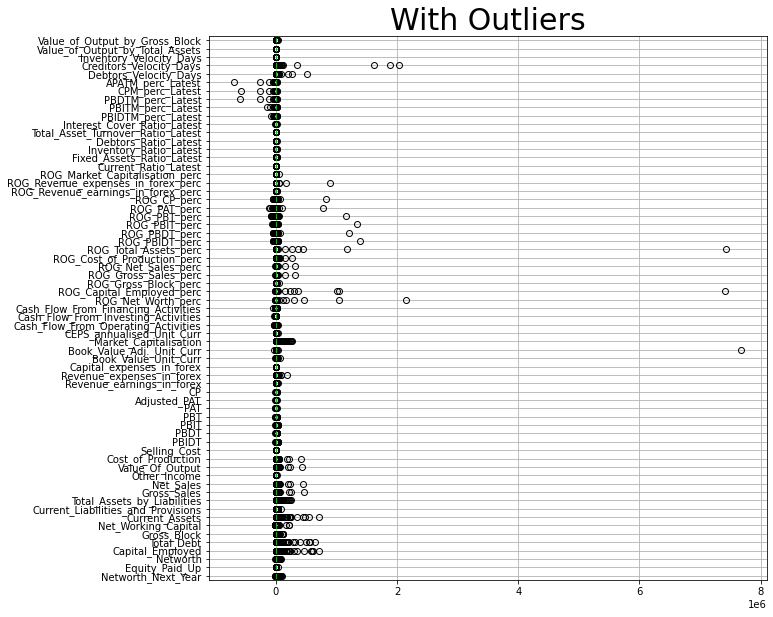

In [22]:
cont=df.dtypes[(df.dtypes!='float8') & (df.dtypes!='int8')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=30)

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [24]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

Text(0.5, 1.0, 'After Outlier Removal')

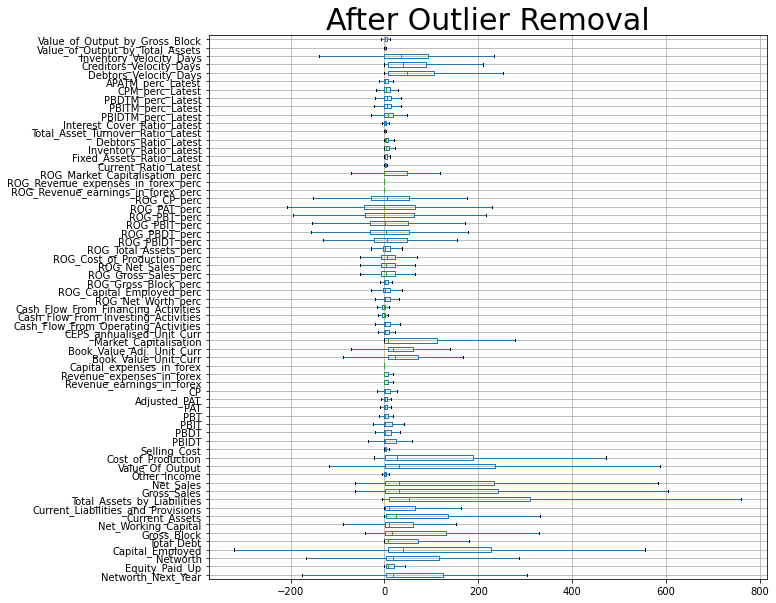

In [25]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=30)

In [26]:
df['Networth_Next_Year'].isnull().sum()

0

In [27]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [28]:
df[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-175.74125
1,1,-175.74125
2,1,-175.74125
3,1,-175.74125
4,1,-175.74125
5,1,-175.74125
6,1,-175.74125
7,1,-175.74125
8,1,-175.74125
9,1,-175.74125


In [29]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [30]:
388/(388+3198)*100

10.819854991634132

In [31]:
df[['default','Networth_Next_Year']].describe()

,default,Networth_Next_Year
count,3586.000000,3586.000000
mean,0.108199,77.399862
std,0.310674,120.475995
min,0.000000,-175.741250
25%,0.000000,3.985000
50%,0.000000,19.015000
75%,0.000000,123.802500
max,1.000000,303.528750


In [32]:
df.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj._Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,-175.74125,43.16875,-166.215,-320.90125,180.83,328.8825,-89.40625,40.50000,163.02625,109.6000,0.00000,0.00,7.6000,-0.070,137.670,0.00000,-35.1875,-19.4175,-25.00125,-11.28375,-8.46,-8.23875,-16.365,0.00,0.00000,0.0,-87.595,-72.2775,0.00000,-13.15875,-19.74,1.46000,9.915,-15.3100,-20.76000,-9.75,0.00000,0.000,1.38,-25.75,5.23000,-19.29000,4.430,-19.33000,-19.3300,-19.29000,0.0,0.0,0.00,0.02,0.00,0.00000,0.00,0.00,-0.20,0.00000,0.0000,0.00,0.00000,0.00000,0.0,0.0,45.0,0.00,0.00,1
1,-175.74125,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,760.5175,603.46125,583.94,9.0575,587.475,472.465,9.70625,58.7525,-4.3200,35.53000,-11.28375,-8.46,-8.23875,-4.320,6.35,17.46875,0.0,-15.180,-15.1800,278.64375,-0.02000,32.08,-12.97375,9.915,-20.7625,6.30000,3.17,5.92000,5.920,13.16,6.66,5.24000,-108.77000,172.385,-9.85000,-9.8500,-108.77000,0.0,0.0,6.61,0.08,0.25,22.34375,10.35,0.30,-0.84,-10.30000,-21.4275,-21.15,-17.08125,-11.11125,29.0,101.0,2.0,0.31,0.24,1
2,-175.74125,43.16875,287.405,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,392.13000,392.13,9.0575,301.160,408.510,9.70625,-35.1875,-19.4175,-25.00125,-11.28375,-8.46,-8.23875,-16.365,0.00,17.46875,0.0,94.140,94.1400,278.64375,-13.15875,-19.74,-12.97375,9.915,-20.7625,15.66000,-2.07,-52.48125,-52.645,-52.79,-0.78,-130.21875,-155.86625,-153.595,-196.02375,-207.3525,-153.12375,0.0,0.0,-6.31,1.06,0.03,0.01000,0.42,0.00,-2.21,-28.48125,-21.4275,-21.15,-17.08125,-11.11125,97.0,210.5,0.0,-0.03,-0.26,1
3,-175.74125,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,760.5175,603.46125,583.94,9.0575,587.475,472.465,3.34000,-35.1875,-19.4175,-25.00125,-11.28375,-8.46,-8.23875,-16.365,0.89,17.46875,0.0,-39.640,-39.6400,194.27000,-13.15875,32.08,7.97625,-15.305,-20.7625,-28.46875,-1.80,8.33000,8.330,16.59,-10.12,-130.21875,-102.72000,-153.595,-80.23000,-70.5700,-88.52000,0.0,0.0,-13.94,0.09,5.08,22.34375,9.26,0.00,-0.16,-3.33000,-7.2100,-21.15,-17.08125,-11.11125,93.0,63.0,2.0,0.24,1.90,1
4,-175.74125,43.16875,-166.215,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,38.72000,38.72,9.0575,38.720,186.290,1.97000,-35.1875,-19.4175,-25.00125,-11.28375,-8.46,-8.23875,-16.365,0.00,15.62000,0.0,-87.595,-72.2775,113.68000,-13.15875,-19.74,7.97625,9.915,-20.7625,-11.76000,0.34,-52.48125,-52.645,-48.80,-5.81,-40.07000,3.28000,-38.720,1.87000,-2.5900,-1.13000,0.0,0.0,-12.91,0.50,0.05,0.02000,1.28,0.01,-0.73,-28.48125,-21.4275,-21.15,28.46875,18.51875,253.0,210.5,0.0,0.01,0.05,1


In [33]:
df['PBIDTM_perc_Latest'].describe()

count    3586.000000
mean       10.548013
std        18.933630
min       -28.481250
25%         0.000000
50%         8.070000
75%        18.987500
max        47.468750
Name: PBIDTM_perc_Latest, dtype: float64

In [34]:
df.loc[df['default'] == 0,'PBIDTM_perc_Latest'].describe()

count    3198.000000
mean       12.197627
std        18.388307
min       -28.481250
25%         1.852500
50%         9.150000
75%        20.630000
max        47.468750
Name: PBIDTM_perc_Latest, dtype: float64

In [35]:
df.loc[df['default'] == 1,'PBIDTM_perc_Latest'].describe()

count    388.000000
mean      -3.048541
std       17.880413
min      -28.481250
25%      -13.432500
50%        0.000000
75%        2.985000
max       47.468750
Name: PBIDTM_perc_Latest, dtype: float64

In [36]:
df.loc[df['default'] == 1,'Networth_Next_Year'].describe()

count    388.000000
mean     -51.770802
std       67.456959
min     -175.741250
25%      -78.390000
50%      -12.705000
75%       -2.977500
max        0.000000
Name: Networth_Next_Year, dtype: float64

In [37]:
df.loc[df['default'] == 0,'Networth_Next_Year'].describe()

count    3198.000000
mean       93.071600
std       115.993612
min         0.010000
25%         6.870000
50%        26.505000
75%       160.090000
max       303.528750
Name: Networth_Next_Year, dtype: float64

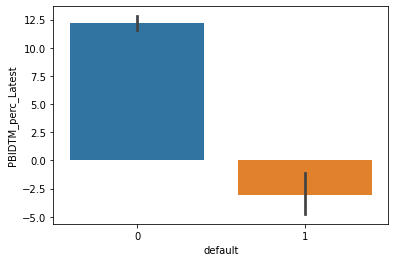

In [38]:
sns.barplot(y='PBIDTM_perc_Latest', x='default', data=df)

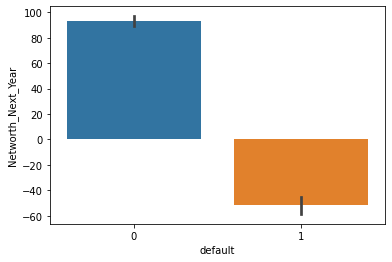

In [39]:
sns.barplot(y='Networth_Next_Year', x='default', data=df)

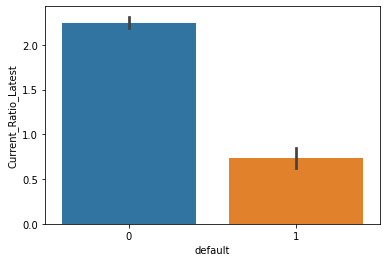

In [40]:
sns.barplot(y='Current_Ratio_Latest', x='default', data=df)

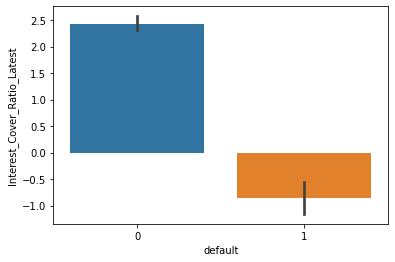

In [41]:
sns.barplot(y='Interest_Cover_Ratio_Latest', x='default', data=df)

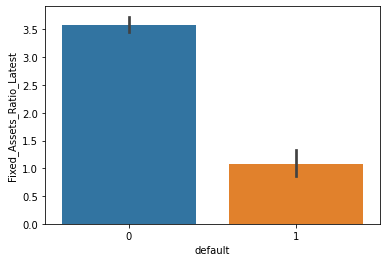

In [42]:
sns.barplot(y='Fixed_Assets_Ratio_Latest', x='default', data=df)

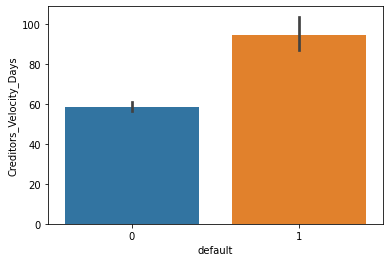

In [43]:
sns.barplot(y='Creditors_Velocity_Days', x='default', data=df)

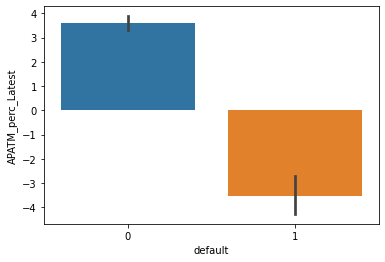

In [44]:
sns.barplot(y='APATM_perc_Latest', x='default', data=df)

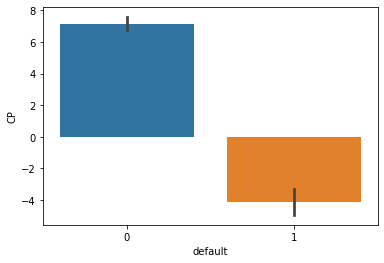

In [45]:
sns.barplot(y='CP', x='default', data=df)

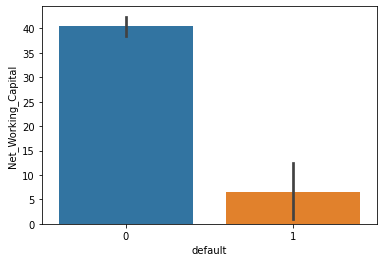

In [46]:
sns.barplot(y='Net_Working_Capital', x='default', data=df)

In [63]:
import statsmodels.formula.api as SM

In [64]:
X = df.drop(['default','Networth_Next_Year'], axis=1)
y = df['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=df['default'])

df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [66]:
vif_sort=calc_vif(X_train).sort_values(by='VIF', ascending = True)
vif_sort

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
34,ROG_Gross_Block_perc,1.524386
47,ROG_Market_Capitalisation_perc,1.676561
61,Inventory_Velocity_Days,1.924207
37,ROG_Cost_of_Production_perc,2.029579
60,Creditors_Velocity_Days,2.305668
...,...,...
9,Gross_Sales,763.156319
10,Net_Sales,1419.303792
24,Capital_expenses_in_forex,NaN
45,ROG_Revenue_earnings_in_forex_perc,NaN


In [67]:
vif_sort.head(30)

,variables,VIF
34,ROG_Gross_Block_perc,1.524386
47,ROG_Market_Capitalisation_perc,1.676561
61,Inventory_Velocity_Days,1.924207
37,ROG_Cost_of_Production_perc,2.029579
60,Creditors_Velocity_Days,2.305668
50,Inventory_Ratio_Latest,2.343545
48,Current_Ratio_Latest,2.397185
59,Debtors_Velocity_Days,2.474369
51,Debtors_Ratio_Latest,2.531709
53,Interest_Cover_Ratio_Latest,2.541902


In [68]:
f_1 = 'default ~ ROG_Gross_Block_perc + ROG_Market_Capitalisation_perc + Inventory_Velocity_Days + ROG_Cost_of_Production_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Current_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + Cash_Flow_From_Financing_Activities + Revenue_earnings_in_forex + ROG_Total_Assets_perc + Revenue_expenses_in_forex + ROG_Capital_Employed_perc + Cash_Flow_From_Operating_Activities + Equity_Paid_Up + Market_Capitalisation + Other_Income + Selling_Cost + Net_Working_Capital + CEPS_annualised_Unit_Curr + Total_Debt'

In [76]:
model_1 = SM.logit(formula = f_1, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.185930
         Iterations 9


In [77]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           25
Date:                Sun, 14 Feb 2021   Pseudo R-squ.:                  0.4577
Time:                        13:38:13   Log-Likelihood:                -446.60
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                6.802e-143
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.5867      0.189     -3.108      0.002      -0.957      -0.217
ROG_Gross_Block_perc                   -0.0464      0.016     -2.986      0.003      -0.077      -0.016
ROG_Market_Capitalisation_perc          0.0008      0.002      0.358      0.720      -0.004       0.005
Inventory_Velocity_Days                -0.0010      0.001     -0.825      0.410      -0.004       0.001
ROG_Cost_of_Production_perc            -0.0089      0.003     -3.311      0.001      -0.014      -0.004
Creditors_Velocity_Days                 0.0024      0.001      2.048      0.041       0.000       0.005
Inventory_Ratio_Latest                 -0.0200      0.015     -1.313      0.189      -0.050       0.010
Current_Ratio_Latest                   -0.5749      0.075     -7.671      0.000      -0.722      -0.428
Debtors_Velocity_Days                  -0.0040      0.001     -3.606      0.000      -0.006      -0.002
Debtors_Ratio_Latest                   -0.0351      0.017     -2.115      0.034      -0.068      -0.003
Interest_Cover_Ratio_Latest            -0.1570      0.035     -4.501      0.000      -0.225      -0.089
Cash_Flow_From_Investing_Activities    -0.0050      0.027     -0.183      0.855      -0.059       0.049
ROG_Net_Worth_perc                     -0.0274      0.010     -2.811      0.005      -0.046      -0.008
Cash_Flow_From_Financing_Activities     0.0054      0.024      0.223      0.824      -0.042       0.053
Revenue_earnings_in_forex              -0.0312      0.022     -1.441      0.150      -0.074       0.011
ROG_Total_Assets_perc                  -0.0167      0.008     -2.018      0.044      -0.033      -0.000
Revenue_expenses_in_forex               0.0461      0.022      2.068      0.039       0.002       0.090
ROG_Capital_Employed_perc               0.0029      0.008      0.344      0.731      -0.014       0.019
Cash_Flow_From_Operating_Activities    -0.0102      0.014     -0.714      0.475      -0.038       0.018
Equity_Paid_Up                         -0.0022      0.009     -0.241      0.809      -0.020       0.015
Market_Capitalisation                  -0.0119      0.002     -5.410      0.000      -0.016      -0.008
Other_Income                           -0.0271      0.045     -0.600      0.549      -0.115       0.061
Selling_Cost                           -0.0600      0.050     -1.192      0.233      -0.159       0.039
Net_Working_Capital                    -0.0148      0.002     -6.119      0.000      -0.019      -0.010
CEPS_annualised_Unit_Curr              -0.0874      0.019     -4.485      0.000      -0.126      -0.049
Total_Debt                              0.0164      0.003      6.373      0.000       0.011       0.021
=======================================================================================================
"""

In [78]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.4272968680507636


Adjusted pseudo R-square seems to be lower than Pseudo R-square value which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

In [79]:
f_2 = 'default ~ ROG_Gross_Block_perc + Inventory_Velocity_Days + ROG_Cost_of_Production_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Current_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + ROG_Net_Worth_perc + Revenue_earnings_in_forex + ROG_Total_Assets_perc + Revenue_expenses_in_forex + Market_Capitalisation + Selling_Cost + Net_Working_Capital + CEPS_annualised_Unit_Curr + Total_Debt'

In [80]:
model_2 = SM.logit(formula = f_2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.186552
         Iterations 9


In [81]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Sun, 14 Feb 2021   Pseudo R-squ.:                  0.4558
Time:                        13:41:45   Log-Likelihood:                -448.10
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                9.504e-148
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.5930      0.178     -3.322      0.001      -0.943      -0.243
ROG_Gross_Block_perc           -0.0447      0.015     -2.931      0.003      -0.075      -0.015
Inventory_Velocity_Days        -0.0010      0.001     -0.824      0.410      -0.004       0.001
ROG_Cost_of_Production_perc    -0.0092      0.003     -3.396      0.001      -0.014      -0.004
Creditors_Velocity_Days         0.0024      0.001      2.043      0.041    9.92e-05       0.005
Inventory_Ratio_Latest         -0.0209      0.015     -1.375      0.169      -0.051       0.009
Current_Ratio_Latest           -0.5720      0.075     -7.668      0.000      -0.718      -0.426
Debtors_Velocity_Days          -0.0041      0.001     -3.701      0.000      -0.006      -0.002
Debtors_Ratio_Latest           -0.0355      0.017     -2.152      0.031      -0.068      -0.003
Interest_Cover_Ratio_Latest    -0.1569      0.035     -4.520      0.000      -0.225      -0.089
ROG_Net_Worth_perc             -0.0266      0.009     -2.920      0.004      -0.044      -0.009
Revenue_earnings_in_forex      -0.0354      0.021     -1.661      0.097      -0.077       0.006
ROG_Total_Assets_perc          -0.0128      0.007     -1.965      0.049      -0.026   -3.07e-05
Revenue_expenses_in_forex       0.0441      0.022      2.031      0.042       0.002       0.087
Market_Capitalisation          -0.0122      0.002     -5.900      0.000      -0.016      -0.008
Selling_Cost                   -0.0665      0.048     -1.381      0.167      -0.161       0.028
Net_Working_Capital            -0.0145      0.002     -6.136      0.000      -0.019      -0.010
CEPS_annualised_Unit_Curr      -0.0920      0.019     -4.839      0.000      -0.129      -0.055
Total_Debt                      0.0153      0.002      6.876      0.000       0.011       0.020
===============================================================================================
"""

In [82]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.4339825219677367


Adjusted pseudo R-square seems to be lower than Pseudo R-square value which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

In [83]:
f_3 = 'default ~ ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + Creditors_Velocity_Days + Current_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Revenue_expenses_in_forex + Market_Capitalisation + Net_Working_Capital + CEPS_annualised_Unit_Curr + Total_Debt'

In [84]:
model_3 = SM.logit(formula = f_3, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.188582
         Iterations 9


In [85]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Sun, 14 Feb 2021   Pseudo R-squ.:                  0.4499
Time:                        13:44:27   Log-Likelihood:                -452.97
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.558e-149
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6462      0.176     -3.676      0.000      -0.991      -0.302
ROG_Gross_Block_perc           -0.0480      0.015     -3.178      0.001      -0.078      -0.018
ROG_Cost_of_Production_perc    -0.0087      0.003     -3.246      0.001      -0.014      -0.003
Creditors_Velocity_Days         0.0027      0.001      2.293      0.022       0.000       0.005
Current_Ratio_Latest           -0.5771      0.076     -7.629      0.000      -0.725      -0.429
Debtors_Velocity_Days          -0.0044      0.001     -4.116      0.000      -0.007      -0.002
Debtors_Ratio_Latest           -0.0521      0.015     -3.392      0.001      -0.082      -0.022
Interest_Cover_Ratio_Latest    -0.1572      0.034     -4.599      0.000      -0.224      -0.090
ROG_Net_Worth_perc             -0.0245      0.009     -2.749      0.006      -0.042      -0.007
ROG_Total_Assets_perc          -0.0124      0.006     -1.911      0.056      -0.025       0.000
Revenue_expenses_in_forex       0.0124      0.019      0.657      0.511      -0.025       0.049
Market_Capitalisation          -0.0127      0.002     -6.168      0.000      -0.017      -0.009
Net_Working_Capital            -0.0149      0.002     -6.407      0.000      -0.019      -0.010
CEPS_annualised_Unit_Curr      -0.0973      0.019     -5.203      0.000      -0.134      -0.061
Total_Debt                      0.0134      0.002      6.492      0.000       0.009       0.018
===============================================================================================
"""

In [86]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.43291769631310995


In [88]:
f_4 = 'default ~ ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + Creditors_Velocity_Days + Current_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + ROG_Net_Worth_perc + Market_Capitalisation + Net_Working_Capital + CEPS_annualised_Unit_Curr + Total_Debt'

In [89]:
model_4 = SM.logit(formula = f_4, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.189450
         Iterations 9


In [90]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Sun, 14 Feb 2021   Pseudo R-squ.:                  0.4474
Time:                        13:45:39   Log-Likelihood:                -455.06
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.756e-150
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6333      0.175     -3.618      0.000      -0.976      -0.290
ROG_Gross_Block_perc           -0.0542      0.015     -3.690      0.000      -0.083      -0.025
ROG_Cost_of_Production_perc    -0.0090      0.003     -3.384      0.001      -0.014      -0.004
Creditors_Velocity_Days         0.0027      0.001      2.285      0.022       0.000       0.005
Current_Ratio_Latest           -0.5813      0.076     -7.675      0.000      -0.730      -0.433
Debtors_Velocity_Days          -0.0044      0.001     -4.058      0.000      -0.006      -0.002
Debtors_Ratio_Latest           -0.0505      0.015     -3.336      0.001      -0.080      -0.021
Interest_Cover_Ratio_Latest    -0.1565      0.034     -4.628      0.000      -0.223      -0.090
ROG_Net_Worth_perc             -0.0314      0.008     -3.822      0.000      -0.048      -0.015
Market_Capitalisation          -0.0125      0.002     -6.301      0.000      -0.016      -0.009
Net_Working_Capital            -0.0149      0.002     -6.523      0.000      -0.019      -0.010
CEPS_annualised_Unit_Curr      -0.0954      0.019     -5.131      0.000      -0.132      -0.059
Total_Debt                      0.0136      0.002      6.789      0.000       0.010       0.017
===============================================================================================
"""

In [91]:
print('The adjusted pseudo R-square value is',1 - ((model_4.llf - model_4.df_model)/model_4.llnull))

The adjusted pseudo R-square value is 0.4328149398733373


In [93]:
y_prob_pred_train = model_4.predict(df_train)
y_prob_pred_train

842     0.017041
1057    0.002103
1595    0.000318
100     0.644438
1191    0.035607
          ...   
1815    0.009139
2852    0.052999
1505    0.006965
375     0.578453
3428    0.000063
Length: 2402, dtype: float64

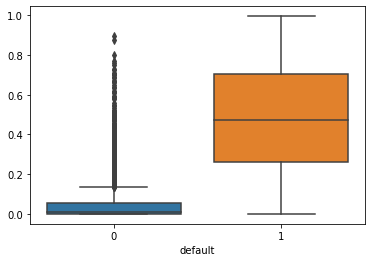

In [96]:
sns.boxplot(x=df['default'],y=y_prob_pred_train)
plt.xlabel('default');


In [97]:
  y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [99]:
import sklearn.metrics as metrics

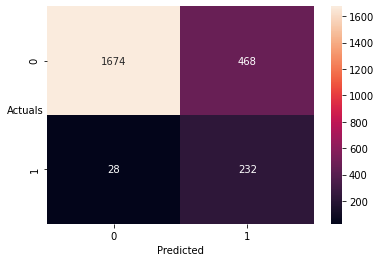

In [100]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [101]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1674 
False Positives: 468 
False Negatives: 28 
True Positives: 232


In [102]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.984     0.782     0.871      2142
           1      0.331     0.892     0.483       260

    accuracy                          0.794      2402
   macro avg      0.657     0.837     0.677      2402
weighted avg      0.913     0.794     0.829      2402



In [103]:
y_prob_pred_test = model_4.predict(X_test)
y_prob_pred_test

251     0.296812
3493    0.000221
3063    0.016066
2384    0.030295
1679    0.001167
          ...   
1321    0.047644
2666    0.005734
773     0.006075
3488    0.000271
2956    0.003874
Length: 1184, dtype: float64

In [111]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

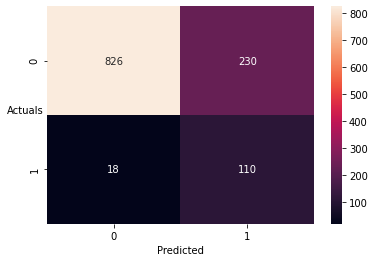

In [112]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [113]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 826 
False Positives: 230 
False Negatives: 18 
True Positives: 110


In [114]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.979     0.782     0.869      1056
           1      0.324     0.859     0.470       128

    accuracy                          0.791      1184
   macro avg      0.651     0.821     0.670      1184
weighted avg      0.908     0.791     0.826      1184



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


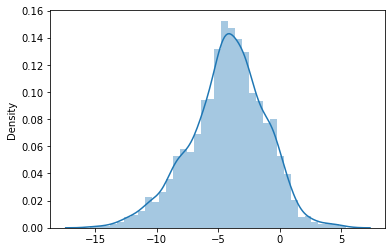

In [115]:
sns.distplot(model_4.fittedvalues);

In [118]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred.append(a)

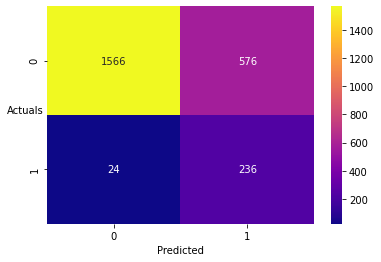

In [119]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [120]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.985     0.731     0.839      2142
           1      0.291     0.908     0.440       260

    accuracy                          0.750      2402
   macro avg      0.638     0.819     0.640      2402
weighted avg      0.910     0.750     0.796      2402



In [121]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.05:
        a=1
    else:
        a=0
    y_class_pred.append(a)

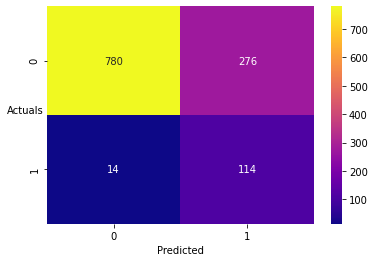

In [122]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [123]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.982     0.739     0.843      1056
           1      0.292     0.891     0.440       128

    accuracy                          0.755      1184
   macro avg      0.637     0.815     0.642      1184
weighted avg      0.908     0.755     0.800      1184



In [124]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred.append(a)

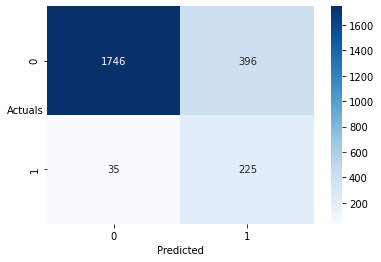

In [127]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [128]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.815     0.890      2142
           1      0.362     0.865     0.511       260

    accuracy                          0.821      2402
   macro avg      0.671     0.840     0.700      2402
weighted avg      0.913     0.821     0.849      2402



In [129]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred.append(a)

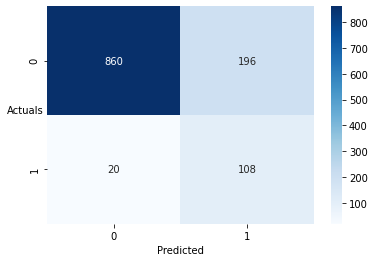

In [130]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [131]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.977     0.814     0.888      1056
           1      0.355     0.844     0.500       128

    accuracy                          0.818      1184
   macro avg      0.666     0.829     0.694      1184
weighted avg      0.910     0.818     0.846      1184

